<a href="https://colab.research.google.com/github/Alex-Bernal27/Colab/blob/main/Tarea_2_CNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 2 Fashion_mnist data



In [ ]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Descargar el dataset y ponerlos en train y test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


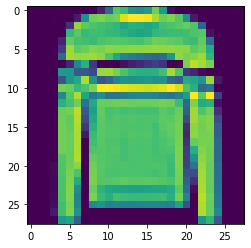

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Clases del dataset
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Índice de imágenes, puede elegir cualquier número entre 0 y 59,999 
img_index = 5
# y_train contiene las etiquetas, que van de 0 a 9 
label_index = y_train[img_index]
# Imprima la etiqueta, por ejemplo 2 Pullover 
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [ ]:
# Divida aún más los datos de entrenamiento en conjuntos de tren / validación (# ponga 5000 en el conjunto de validación y mantenga los 55,000 restantes para el entrenamiento) 
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape datos (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode 
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [ ]:
model = tf.keras.Sequential()

#arquitectura del modelo
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
epochs=10
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
r = model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=epochs,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 37s 5ms/step - loss: 0.8324 - accuracy: 0.6907 - val_loss: 0.3843 - val_accuracy: 0.8690

Epoch 00001: val_loss improved from inf to 0.38433, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 4s 5ms/step - loss: 0.4297 - accuracy: 0.8435 - val_loss: 0.3346 - val_accuracy: 0.8806

Epoch 00002: val_loss improved from 0.38433 to 0.33456, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 4s 5ms/step - loss: 0.3791 - accuracy: 0.8617 - val_loss: 0.2940 - val_accuracy: 0.8936

Epoch 00003: val_loss improved from 0.33456 to 0.29400, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 4s 5ms/step - loss: 0.3520 - accuracy: 0.8727 - val_loss: 0.2763 - val_accuracy: 0.8988

Epoch 00004: val_loss improved from 0.29400 to 0.27634, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [===========================

In [ ]:
# Cargue los pesos con la mejor precisión de validación 
model.load_weights('model.weights.best.hdf5')

# Evaluar el modelo con los test
score = model.evaluate(x_test, y_test, verbose=0)

# Imprimir accuracy
print('\n', 'Test accuracy:', score[1])





 Test accuracy: 0.9110999703407288


313/313 [==============================] - 1s 3ms/step - loss: 0.2425 - accuracy: 0.9111
test set loss :  0.2424965649843216
test set accuracy : 91.10999703407288


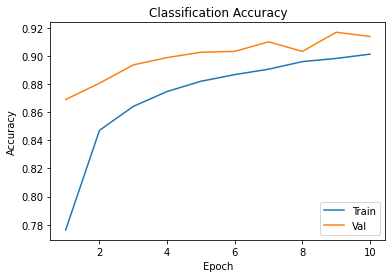

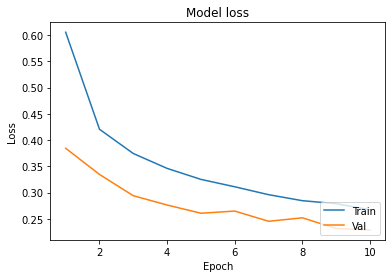

In [ ]:
acc = model.evaluate(x_test, y_test)
print("test set loss : ", acc[0])
print("test set accuracy :", acc[1]*100)
epoch_range = range(1, 10+1)
plt.plot(epoch_range, r.history['accuracy'])
plt.plot(epoch_range, r.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
plt.plot(epoch_range,r.history['loss'])
plt.plot(epoch_range, r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
def predict_class(filename, model):
  img = load_img(filename,target_size=( 28 , 28, 3)) # Lectura como imagen a color
  plt.imshow(img,cmap='Greys')
  img = img_to_array(img) 
  img = np.mean(img, axis=2)  # Promedio de los 3 canales en un solo canal
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  result = model.predict(img)
  dict2 = {}
  for i in range(10):
    dict2[result[0][i]] = fashion_mnist_labels[i]
  res = result[0]
  res.sort()
  res = res[::-1]
  results = res[:3]
  print("Top predictions of these images are")
  for i in range(3):
    print("{} : {}".format(dict2[results[i]],
                           (results[i]*100).round(2)))
  print('The image given as input is')

Top predictions of these images are
Pullover : 96.67
Coat : 2.74
Shirt : 0.46
The image given as input is


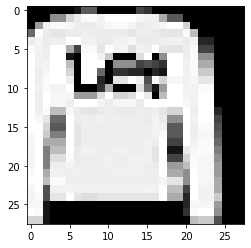

In [ ]:
predict_class('camisa.png',model)

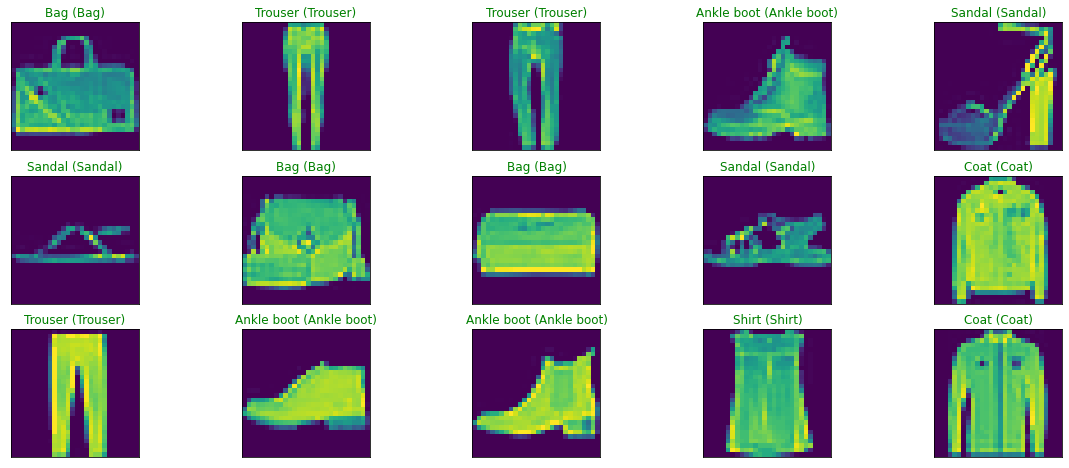

In [ ]:
y_hat = model.predict(x_test)

# M aleatoria de 10 imágenes de prueba, sus etiquetas predichas y la verdadera
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Mostrar cada imagen 
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Ponerle titulo a las imagenes
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))